# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing data

In [2]:
df = pd.read_csv('Customer_Campaign.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Bootstrapping

In [6]:
from sklearn.utils import resample

In [7]:
no = df[df['y'] == 'no']
yes = df[df['y'] == 'yes']

In [8]:
# Increasing 'yes' classes to 20000.
upsampled = resample(yes , replace=True , n_samples=20000)

In [9]:
# combine df with upsampled

final_df = pd.concat([df,upsampled])

In [10]:
final_df['y'].value_counts()

no     39922
yes    25289
Name: y, dtype: int64

In [11]:
# Shuffling the dataset

from sklearn.utils import shuffle
final_df = shuffle(final_df)

# Removing unwanted attributes

In [12]:
final_df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
5866,37,blue-collar,divorced,secondary,no,316,yes,no,unknown,26,may,642,2,-1,0,unknown,yes
13986,26,management,single,tertiary,no,45,no,no,cellular,10,jul,1187,3,-1,0,unknown,yes
3481,43,blue-collar,divorced,primary,no,92,yes,no,unknown,15,may,237,2,-1,0,unknown,no


In [13]:
final_df['poutcome'].value_counts()

unknown    49914
failure     7203
success     5111
other       2983
Name: poutcome, dtype: int64

In [14]:
final_df = final_df.drop(['contact','day','month','duration','pdays','poutcome'] , axis=1)

In [15]:
final_df.head(3)

,age,job,marital,education,default,balance,housing,loan,campaign,previous,y
5866,37,blue-collar,divorced,secondary,no,316,yes,no,2,0,yes
13986,26,management,single,tertiary,no,45,no,no,3,0,yes
3481,43,blue-collar,divorced,primary,no,92,yes,no,2,0,no


# One-hot encoding

In [16]:
X_features = list(final_df.columns)
X_features.remove('y')

In [17]:
encoded_df = pd.get_dummies(final_df[X_features] , drop_first=True)

In [18]:
encoded_df.head(3)

,age,balance,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes
5866,37,316,2,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
13986,26,45,3,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
3481,43,92,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Scaling

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

In [21]:
scaled_df = scaler.fit_transform(encoded_df)

In [22]:
scaled_df = pd.DataFrame(data=scaled_df , columns=encoded_df.columns)
scaled_df.head(3)

,age,balance,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes
0,0.246753,0.075672,0.016129,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.103896,0.073212,0.032258,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.324675,0.073639,0.016129,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Data split

In [23]:
import statsmodels.api as sm

In [24]:
X = scaled_df
X = sm.add_constant(X)
y = final_df['y'].map(lambda x : int(x=='yes')) # Label encoding 'y'
y = list(y)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Model - 1 : Logistic Regression

In [27]:
X.shape

(65211, 24)

In [28]:
logit = sm.Logit(y_train,X_train).fit()

Optimization terminated successfully.
         Current function value: 0.610810
         Iterations 6


# Model - 1 Summary

In [29]:
logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:               Logit             Pseudo R-squared:  0.084     
Dependent Variable:  y                 AIC:               59795.0055
Date:                2020-09-06 21:11  BIC:               60006.1502
No. Observations:    48908             Log-Likelihood:    -29874.   
Df Model:            23                LL-Null:           -32625.   
Df Residuals:        48884             LLR p-value:       0.0000    
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      6.0000                                         
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
const               -0.4182   0.0692  -6.0391 0.0000 -0.5539 -0.2825
age                  0.0660   0.0905   0.7291 0.4660 -0.1114  0.2433
balance              3.2760   0.3678   8.9074 0.0000  2.5552  3.9969
campaign            -6.7860   0.3000 -22.6167 0.0000 -7.3740 -6.1979
previous            39.2808   1.5104  26.0076 0.0000 36.3206 42.2411
job_blue-collar     -0.2612   0.0389  -6.7087 0.0000 -0.3375 -0.1849
job_entrepreneur    -0.4047   0.0674  -6.0056 0.0000 -0.5368 -0.2726
job_housemaid       -0.3409   0.0706  -4.8314 0.0000 -0.4792 -0.2026
job_management      -0.1670   0.0406  -4.1166 0.0000 -0.2465 -0.0875
job_retired          0.5064   0.0543   9.3327 0.0000  0.4000  0.6127
job_self-employed   -0.2019   0.0606  -3.3326 0.0009 -0.3207 -0.0832
job_services        -0.2135   0.0448  -4.7655 0.0000 -0.3013 -0.1257
job_student          0.4125   0.0666   6.1929 0.0000  0.2820  0.5431
job_technician      -0.2013   0.0376  -5.3574 0.0000 -0.2749 -0.1276
job_unemployed       0.1142   0.0602   1.8969 0.0578 -0.0038  0.2322
job_unknown         -0.4192   0.1258  -3.3316 0.0009 -0.6657 -0.1726
marital_married     -0.1484   0.0317  -4.6833 0.0000 -0.2105 -0.0863
marital_single       0.1819   0.0365   4.9897 0.0000  0.1104  0.2533
education_secondary  0.2005   0.0340   5.8964 0.0000  0.1339  0.2672
education_tertiary   0.4650   0.0403  11.5452 0.0000  0.3861  0.5439
education_unknown    0.2800   0.0559   5.0075 0.0000  0.1704  0.3896
default_yes         -0.2410   0.0862  -2.7941 0.0052 -0.4100 -0.0719
housing_yes         -0.7581   0.0209 -36.2923 0.0000 -0.7991 -0.7172
loan_yes            -0.4818   0.0310 -15.5568 0.0000 -0.5424 -0.4211
====================================================================

"""

# Logistic regression - 2

In [30]:
X = X.drop(['age','job_unemployed'],axis=1)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
logit_2 = sm.Logit(y_train,X_train).fit()

Optimization terminated successfully.
         Current function value: 0.610838
         Iterations 6


In [33]:
logit_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:               Logit             Pseudo R-squared:  0.087     
Dependent Variable:  y                 AIC:               63776.3538
Date:                2020-09-06 21:11  BIC:               63971.3228
No. Observations:    52168             Log-Likelihood:    -31866.   
Df Model:            21                LL-Null:           -34888.   
Df Residuals:        52146             LLR p-value:       0.0000    
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      6.0000                                         
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
const               -0.3081   0.0564  -5.4670 0.0000 -0.4185 -0.1976
balance              3.0186   0.3505   8.6123 0.0000  2.3316  3.7056
campaign            -6.5909   0.2854 -23.0967 0.0000 -7.1502 -6.0316
previous            40.3876   1.4747  27.3869 0.0000 37.4972 43.2779
job_blue-collar     -0.2841   0.0351  -8.0979 0.0000 -0.3529 -0.2154
job_entrepreneur    -0.4086   0.0636  -6.4232 0.0000 -0.5333 -0.2839
job_housemaid       -0.3530   0.0667  -5.2897 0.0000 -0.4838 -0.2222
job_management      -0.1967   0.0367  -5.3649 0.0000 -0.2685 -0.1248
job_retired          0.4946   0.0453  10.9129 0.0000  0.4058  0.5834
job_self-employed   -0.2073   0.0570  -3.6377 0.0003 -0.3190 -0.0956
job_services        -0.2166   0.0414  -5.2349 0.0000 -0.2976 -0.1355
job_student          0.4858   0.0626   7.7549 0.0000  0.3630  0.6086
job_technician      -0.1903   0.0338  -5.6242 0.0000 -0.2566 -0.1240
job_unknown         -0.4875   0.1228  -3.9687 0.0001 -0.7283 -0.2468
marital_married     -0.1770   0.0307  -5.7656 0.0000 -0.2372 -0.1168
marital_single       0.1525   0.0333   4.5834 0.0000  0.0873  0.2177
education_secondary  0.1821   0.0326   5.5829 0.0000  0.1182  0.2460
education_tertiary   0.4683   0.0387  12.0855 0.0000  0.3923  0.5442
education_unknown    0.2206   0.0547   4.0355 0.0001  0.1134  0.3277
default_yes         -0.2369   0.0829  -2.8575 0.0043 -0.3993 -0.0744
housing_yes         -0.7758   0.0200 -38.8112 0.0000 -0.8150 -0.7367
loan_yes            -0.4944   0.0300 -16.5029 0.0000 -0.5532 -0.4357
====================================================================

"""

# --> Predictions of logistic regression 2

In [34]:
pred = pd.DataFrame({'actual': y_test , 'predicted_prob':logit_2.predict(X_test)})

In [35]:
pred.sample(10)

,actual,predicted_prob
40474,1,0.317115
22959,0,0.715206
14446,0,0.357267
34365,0,0.403775
57012,1,0.430066
7601,1,0.551241
12438,0,0.276268
58438,0,0.241703
62458,0,0.376000
6867,0,0.207733


In [36]:
# Probabilites greater than 0.42 is classified as subscribed and < 0.42 as not subscribed
pred['predicted'] = pred['predicted_prob'].map(lambda x : 1 if x > 0.42 else 0)

In [37]:
pred.sample(10)

,actual,predicted_prob,predicted
22498,0,0.236123,0
57907,1,0.344269,0
60875,1,0.683445,1
46221,1,0.399937,0
38482,0,0.186450,0
18264,0,0.292345,0
5828,1,0.554026,1
39677,0,0.267268,0
34641,1,0.388552,0
50267,1,0.634784,1


In [38]:
# Accuracy
from sklearn import metrics
metrics.accuracy_score(pred['actual'],pred['predicted'])

0.6703212451123208

# --> Confusion matrix for logistic regression - 2

In [39]:
def CM(actual,pred):
    cm = metrics.confusion_matrix(actual,pred,[1,0])
    sns.heatmap(cm , annot=True , fmt='.2f' , xticklabels=['subscribed','not subscribed'] , 
               yticklabels=['subscribed','not subscribed'])
    plt.ylabel('True values')
    plt.xlabel('Predictions')

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


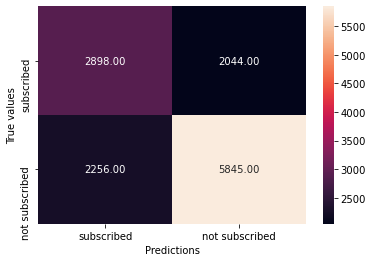

In [40]:
CM(y_test,pred['predicted'])

# --> Classification report for logistic regression - 2

In [41]:
print(metrics.classification_report(y_test,pred['predicted']))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73      8101
           1       0.56      0.59      0.57      4942

    accuracy                           0.67     13043
   macro avg       0.65      0.65      0.65     13043
weighted avg       0.67      0.67      0.67     13043



# --> AUC Score for logistic regression - 2 

In [42]:
metrics.roc_auc_score(pred['actual'] , pred['predicted_prob'])

0.704459821823537

# --> Accuracy of logistic regression - 2

In [43]:
metrics.accuracy_score(pred['actual'] , pred['predicted'])

0.6703212451123208

# Model 2 -  Decision Tree

In [44]:
X_1 = scaled_df
y_1 = final_df['y'].map(lambda x : int(x=='yes')) # Label encoding 'y'

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.2)

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
# Default parameters
tree = DecisionTreeClassifier()

In [48]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [49]:
# Predictions
tree_pred = tree.predict(X_test)

In [50]:
# AUC Score

metrics.roc_auc_score(y_test,tree_pred)

0.9262231006177133

In [51]:
# Classification report

print(metrics.classification_report(y_test , tree_pred))

              precision    recall  f1-score   support

           0       0.99      0.87      0.92      8056
           1       0.82      0.99      0.90      4987

    accuracy                           0.91     13043
   macro avg       0.91      0.93      0.91     13043
weighted avg       0.93      0.91      0.91     13043



In [52]:
# Accuracy

metrics.accuracy_score(y_test,tree_pred)

0.9122134478264203

# Model 3 - KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
knn_clf = KNeighborsClassifier()

In [55]:
knn_clf.fit(X_train,y_train)

KNeighborsClassifier()

In [56]:
knn_pred = knn_clf.predict(X_test)

In [57]:
print(metrics.classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      8056
           1       0.68      0.87      0.77      4987

    accuracy                           0.80     13043
   macro avg       0.79      0.81      0.79     13043
weighted avg       0.82      0.80      0.80     13043



In [58]:
# Accuracy

metrics.accuracy_score(y_test , knn_pred)

0.797132561527256

In [59]:
# AUC Score

metrics.roc_auc_score(y_test , knn_pred)

0.81098593433294

# Model 4 - Random forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
# Finding optimal parameters

param = [{'max_depth':[10,15],
         'n_estimators':[10,20],
         'max_features':['sqrt',0.2]}]

rand_clf = RandomForestClassifier()

clf = GridSearchCV(rand_clf , param , cv=5 , scoring='roc_auc')
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 15], 'max_features': ['sqrt', 0.2],
                          'n_estimators': [10, 20]}],
             scoring='roc_auc')

In [63]:
# AUC Score
clf.best_score_

0.8825515029982697

In [64]:
# Best parameters
clf.best_estimator_

RandomForestClassifier(max_depth=15, max_features=0.2, n_estimators=20)

In [65]:
# Model with best parameters

rand_clf = RandomForestClassifier(max_depth=15 , n_estimators=20 , max_features='sqrt')

In [66]:
rand_clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=15, max_features='sqrt', n_estimators=20)

In [67]:
# Predictions
forest_pred = rand_clf.predict(X_test)

In [68]:
# Classification report

print(metrics.classification_report(y_test , forest_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      8056
           1       0.81      0.63      0.71      4987

    accuracy                           0.80     13043
   macro avg       0.80      0.77      0.78     13043
weighted avg       0.80      0.80      0.80     13043



In [69]:
# Accuracy

metrics.accuracy_score(y_test,forest_pred)

0.8017327302001074

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


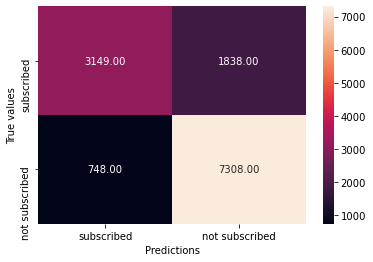

In [70]:
# Confusion matrix
CM(y_test,forest_pred)

Text(0.5, 1.0, 'Most important features')

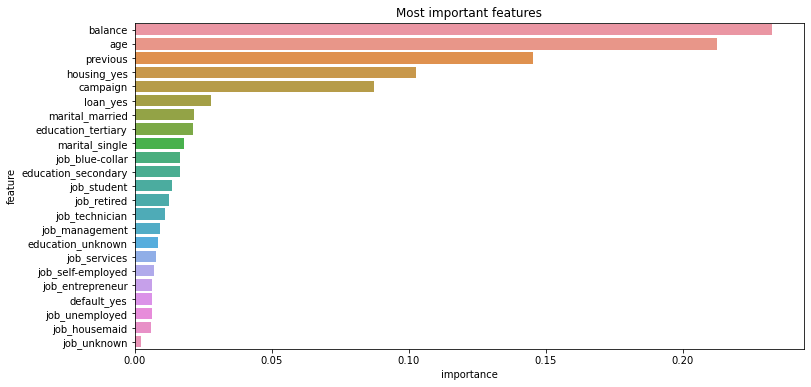

In [71]:
# Finding important features

rank = pd.DataFrame({'feature': X_train.columns , 'importance': rand_clf.feature_importances_})
rank = rank.sort_values('importance',ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(y='feature',x='importance',data=rank)
plt.title('Most important features')

# Model 5 : Adaboost

In [72]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

In [73]:
logistic = LogisticRegression()

In [74]:
ada_clf = AdaBoostClassifier(base_estimator=logistic , n_estimators=50)

In [75]:
ada_clf.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=LogisticRegression())

In [76]:
# predictions
ada_pred = ada_clf.predict(X_test)

In [77]:
# Accuracy score
metrics.accuracy_score(y_test,ada_pred)

0.6556773748370773

In [78]:
# AUC score
metrics.roc_auc_score(y_test,ada_pred)

0.5921640928778279

# Model 6 : Gradient boost

In [79]:
from sklearn.ensemble import GradientBoostingClassifier

In [80]:
gboost = GradientBoostingClassifier(n_estimators=500 , max_depth=10)

In [81]:
gboost.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=500)

In [82]:
# Accuracy

gboost_pred = gboost.predict(X_test)
metrics.accuracy_score(y_test,gboost_pred)

0.9543816606608909

In [83]:
# AUC Score
metrics.roc_auc_score(y_test,gboost_pred)

0.9589841233682251

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


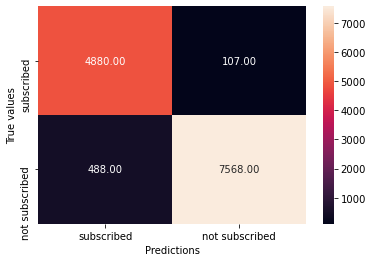

In [84]:
# Confusion matrix

CM(y_test,gboost_pred)

In [85]:
# Classification report

print(metrics.classification_report(y_test,gboost_pred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      8056
           1       0.91      0.98      0.94      4987

    accuracy                           0.95     13043
   macro avg       0.95      0.96      0.95     13043
weighted avg       0.96      0.95      0.95     13043



# Final Analysis

In [90]:
report = pd.DataFrame({'model':['Logistic regresion - 2', 'Decision tree' , 'KNN' , 'RF' , 'AdaBoost' , 'Gradient Boost']})                    

In [93]:
report['accuracy_scores'] = [67 , 91 , 79 , 80 , 59.2 , 95.8]

In [96]:
report['AUC Scores'] = [0.7 , 0.92 , 0.91 , 0.88 , 0.59 , 0.95]

In [97]:
report.sort_values(by='accuracy_scores',ascending=False)

,model,accuracy_scores,AUC Scores
5,Gradient Boost,95.8,0.95
1,Decision tree,91.0,0.92
3,RF,80.0,0.88
2,KNN,79.0,0.91
0,Logistic regresion - 2,67.0,0.70
4,AdaBoost,59.2,0.59
